# US Accidents Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
1. Load the file using Pandas
2. Look at some information about the data and the column
3. Fix any missing or incorrect values
Loading Dataset into Pandas Dataframe

In [2]:
#create data drame to read data set
df = pd.read_csv(r'D:\8samaster\CodSoft\US_Accidents_March23.csv')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [4]:
df['Temperature(F)']

0          36.9
1          37.9
2          36.0
3          35.1
4          36.0
           ... 
7728389    86.0
7728390    70.0
7728391    73.0
7728392    71.0
7728393    79.0
Name: Temperature(F), Length: 7728394, dtype: float64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

# Getting List of Columns Having Null Values

In [7]:
null_cols = [i for i in df.columns if df[i].isnull().any()]
print(null_cols)

['End_Lat', 'End_Lng', 'Description', 'Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


# Checking Missing Values Pattern in Dataframe

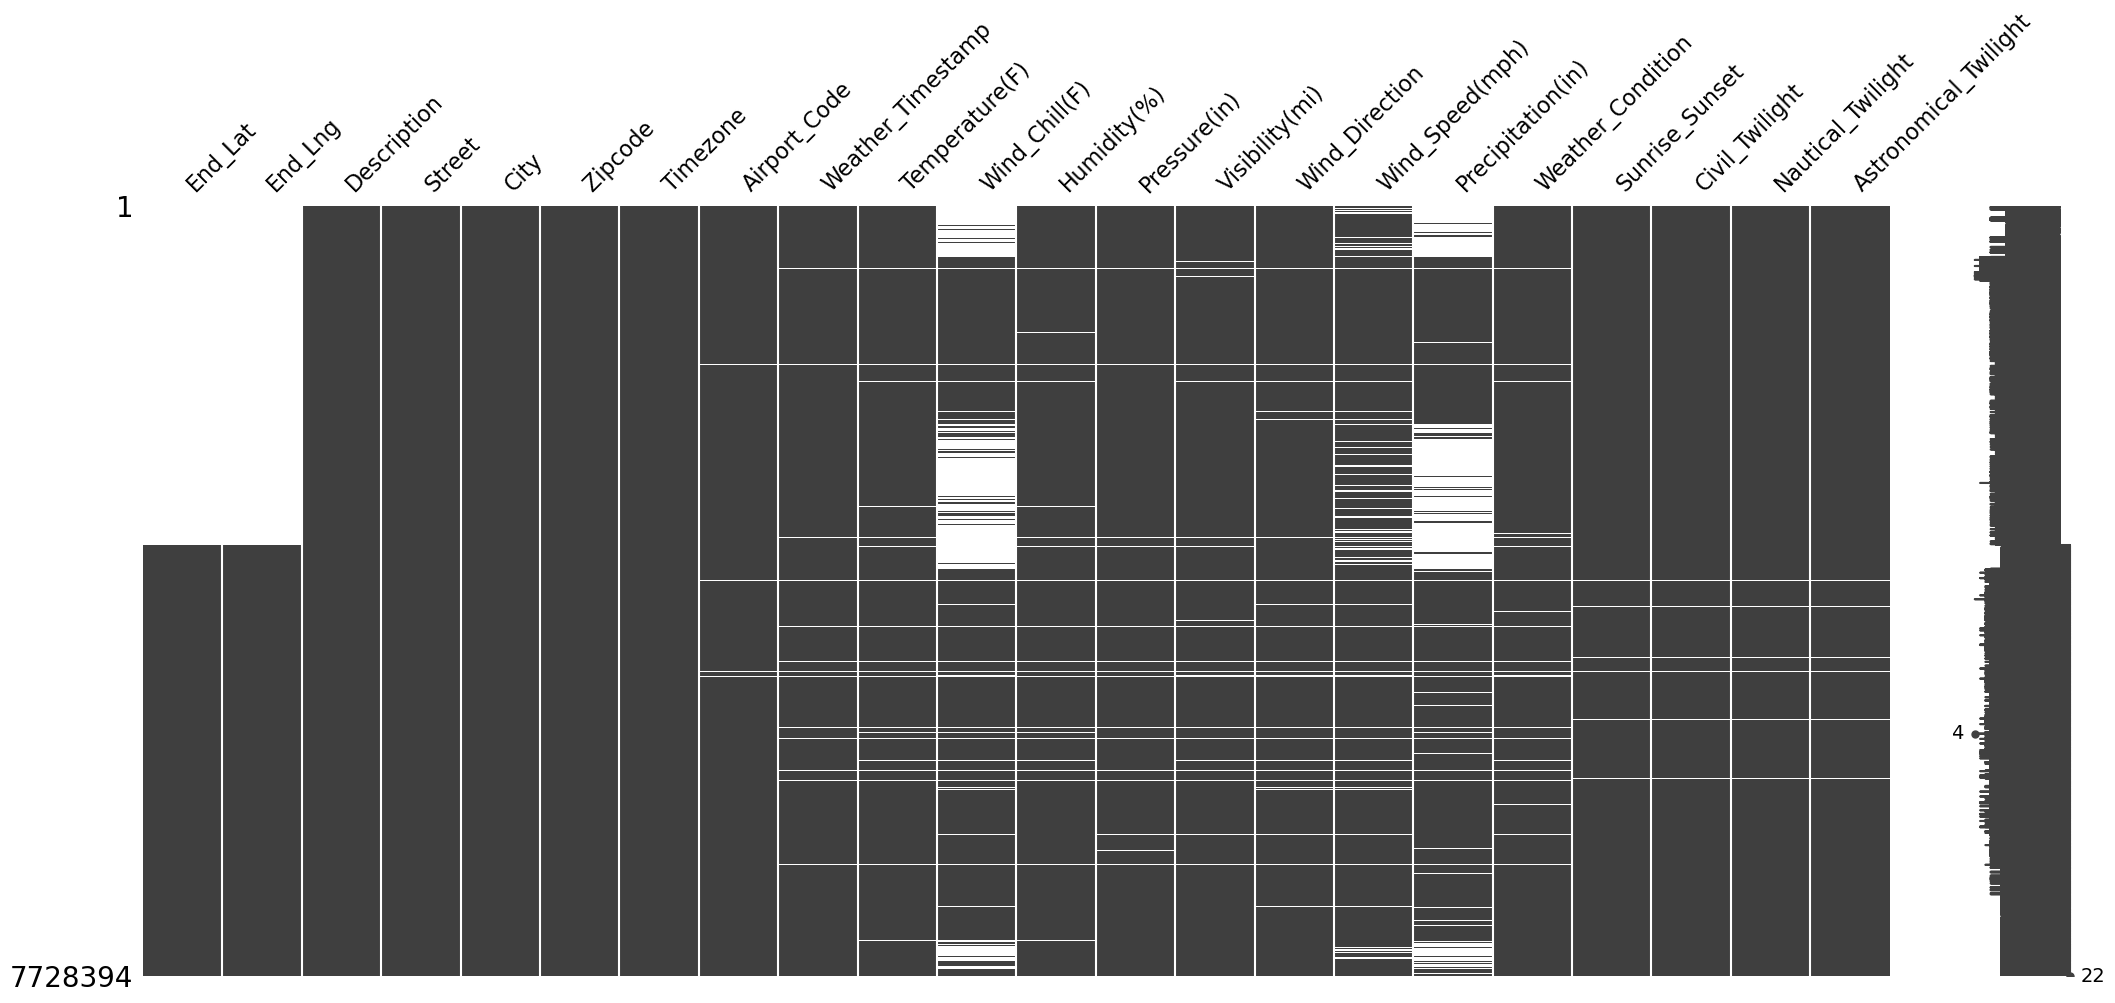

In [13]:
import missingno as mn
mn.matrix(df[null_cols]);

In [14]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Exploratory Analysis and Visualization
Columns we'll analyze:

City
Start Time
Start Lat, Start Lng
Temperature
Weather Condition

In [20]:
list(df.columns)

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [22]:
print('New York' in df['City'].unique())

True


In [24]:
cities = df.City.unique()
cities_by_accident = df.City.value_counts()
ca = pd.DataFrame(cities_by_accident)
top10_cities = ca[ :20]
top10_cities.style

,City
Miami,186917
Houston,169609
Los Angeles,156491
Charlotte,138652
Dallas,130939
Orlando,109733
Austin,97359
Raleigh,86079
Nashville,72930
Baton Rouge,71588


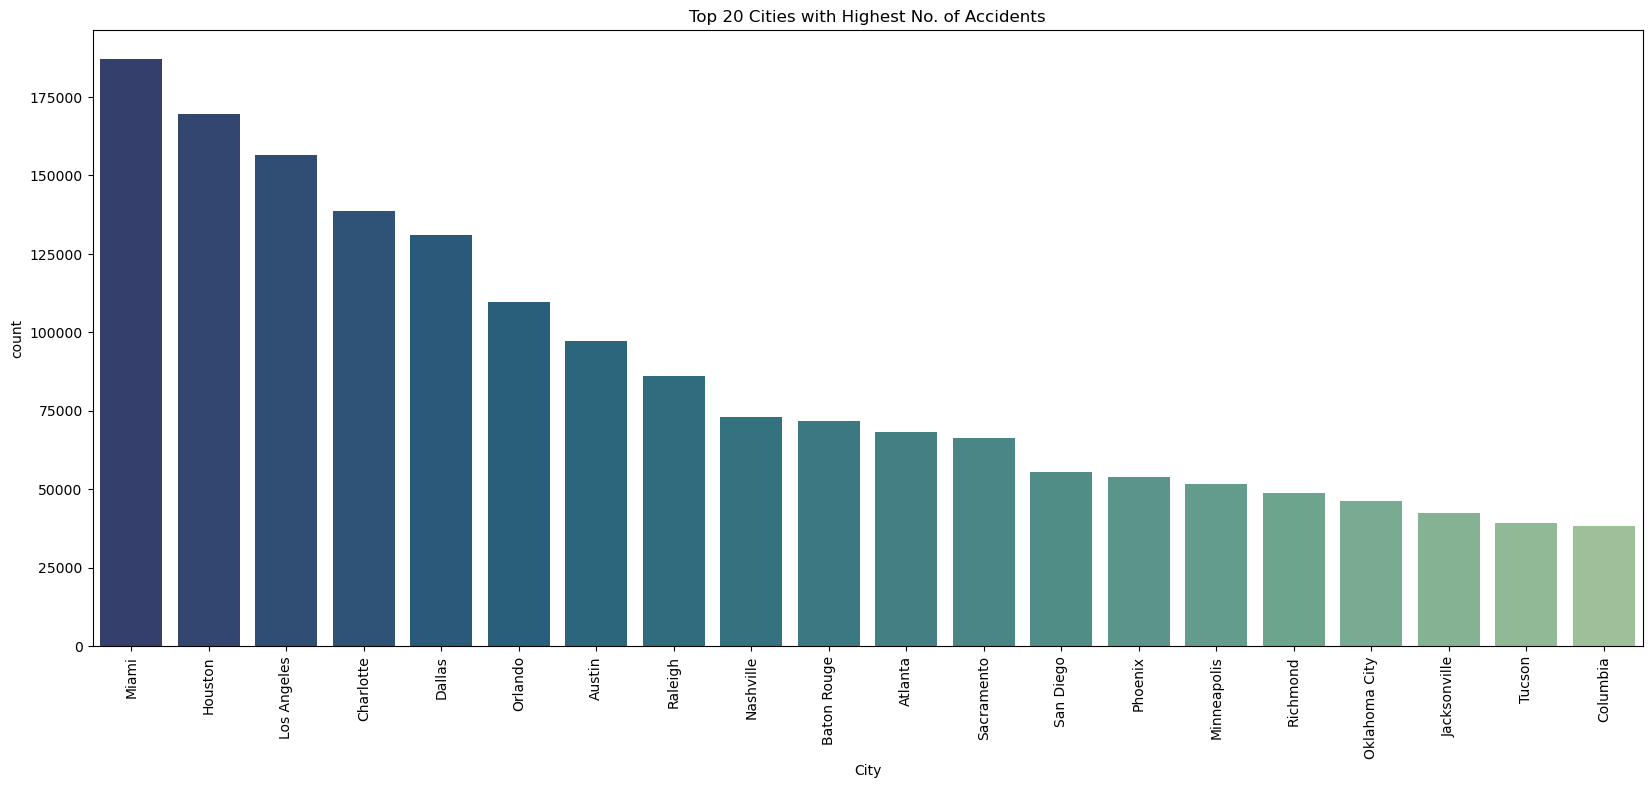

In [25]:
fig, ax = plt.subplots(figsize = (20,8))
c = sns.countplot(x="City", data=df, order=df.City.value_counts().iloc[:20].index, orient = 'v', palette = "crest_r")
c.set_title("Top 20 Cities with Highest No. of Accidents")
c.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.show()

In [27]:
pip install pandas plotly


Note: you may need to restart the kernel to use updated packages.


In [28]:
import plotly.graph_objects as go

In [48]:
state_counts = df["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states", colorscale="turbo"))
fig.update_layout(title_text="Number of Accidents for each State", geo_scope="usa")
fig.show()


In [47]:
print("State Code: ", df.State.unique())
print("Total No. of State in Dataset: ", len(df.State.unique()))

State Code:  ['OH' 'WV' 'CA' 'FL' 'GA' 'SC' 'NE' 'IA' 'IL' 'MO' 'WI' 'IN' 'MI' 'NJ'
 'NY' 'CT' 'MA' 'RI' 'NH' 'PA' 'KY' 'MD' 'VA' 'DC' 'DE' 'TX' 'WA' 'OR'
 'AL' 'NC' 'AZ' 'TN' 'LA' 'MN' 'CO' 'OK' 'NV' 'UT' 'KS' 'NM' 'AR' 'MS'
 'ME' 'VT' 'WY' 'ID' 'ND' 'MT' 'SD']
Total No. of State in Dataset:  49


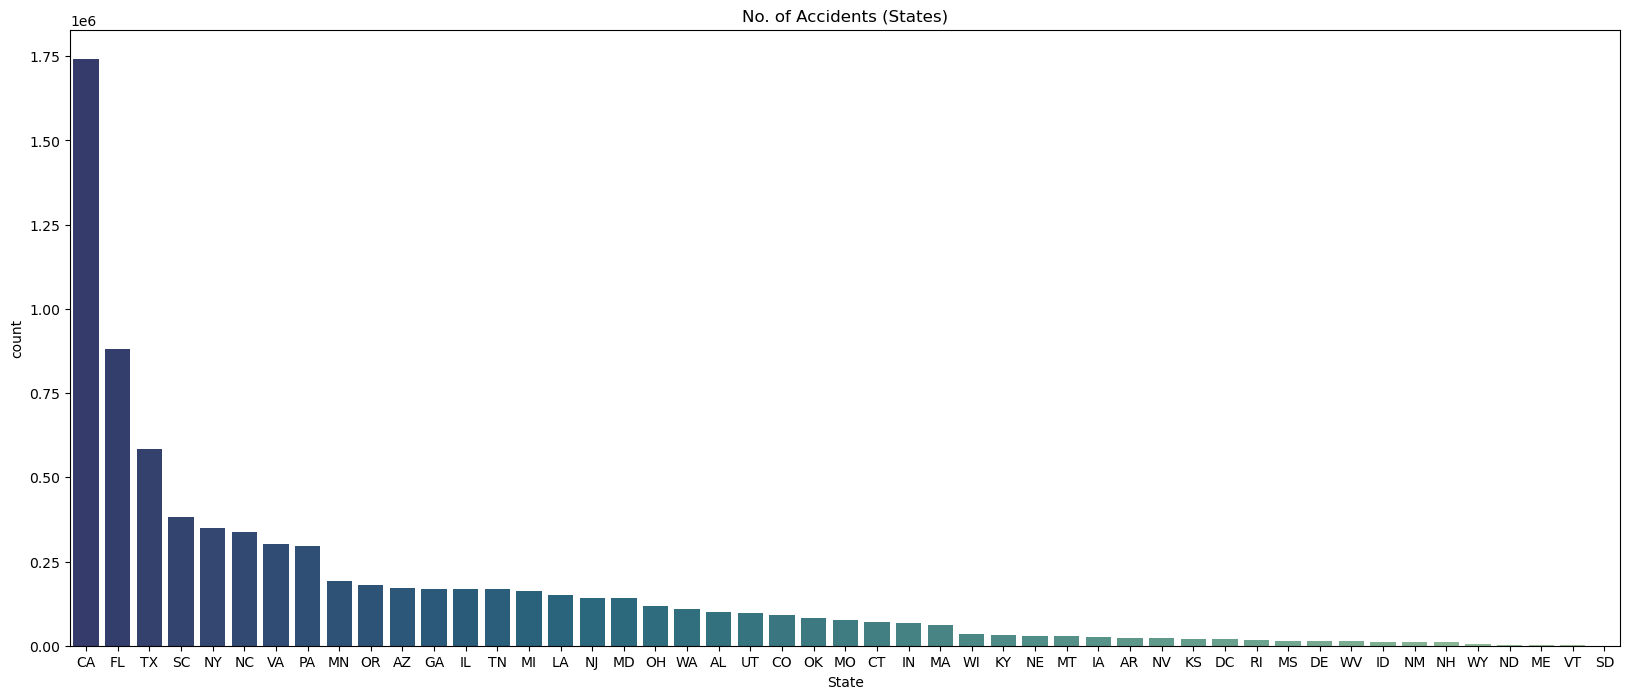

In [32]:
fig, ax = plt.subplots(figsize = (20,8))
c = sns.countplot(x="State", data=df, orient = 'v', palette = "crest_r", order = df['State'].value_counts().index)
c.set_title("No. of Accidents (States)");

# Timestamp

In [33]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [34]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [36]:
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday
#yearly data subset 
data_2016 = df[df.Start_Time.dt.year == 2016]
data_2017 = df[df.Start_Time.dt.year == 2017]
data_2018 = df[df.Start_Time.dt.year == 2018]
data_2019 = df[df.Start_Time.dt.year == 2019]
data_2020 = df[df.Start_Time.dt.year == 2020]
data_2017_2019 = df[(df["Year"] >= 2017) & (df["Year"] <= 2019)]

# Hourly

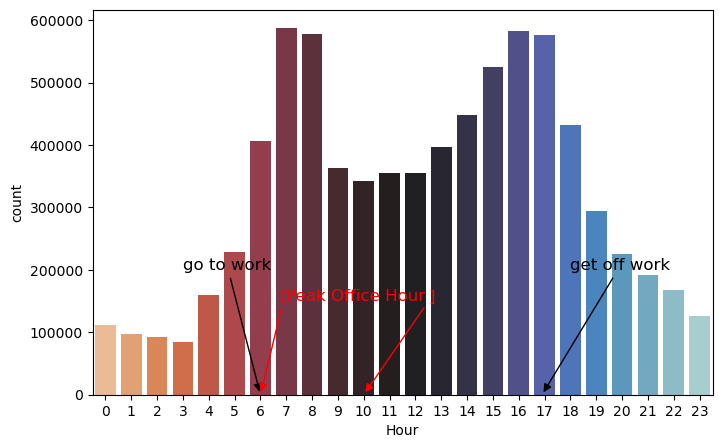

In [37]:
fig, ax = plt.subplots(figsize = (8,5))
sns.countplot(x="Hour", data=df, orient = 'v', palette = "icefire_r")
plt.annotate('go to work',xy=(6,0),xytext=(3,200000),arrowprops={'arrowstyle':'-|>', 'color':'black'}, fontsize=12)
plt.annotate('get off work',xy=(16.9,0),xytext=(18,200000),arrowprops={'arrowstyle':'-|>', 'color':'black'}, fontsize=12)
plt.annotate('Peak Office Hour',xy=(7,150000), color='red', fontsize=12)
plt.annotate("[",xy=(6,0),xytext=(6.8,150000),color='red',arrowprops={'arrowstyle':'-|>', 'color':'red'}, fontsize=12)
plt.annotate("]",xy=(10,0),xytext=(12.5,150000),color='red',arrowprops={'arrowstyle':'-|>','color':'red'}, fontsize=12)
plt.show()

# Weekly

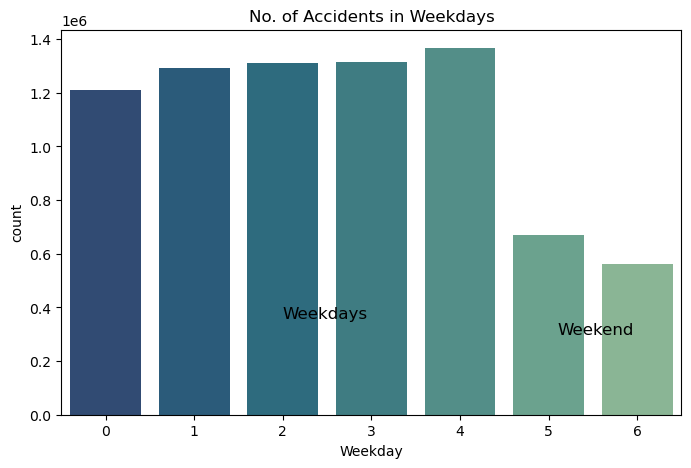

In [38]:
fig, ax = plt.subplots(figsize = (8,5))
c = sns.countplot(x="Weekday", data=df, orient = 'v', palette = "crest_r")
plt.annotate('Weekdays',xy=(2,358000), fontsize=12)
plt.annotate('Weekend',xy=(5.1,300000), fontsize=12)
c.set_title("No. of Accidents in Weekdays")
plt.show()

Most cases are seen in the Weekdays.
Weekends have lower number of cases.

# All Weeks (2016-2020)

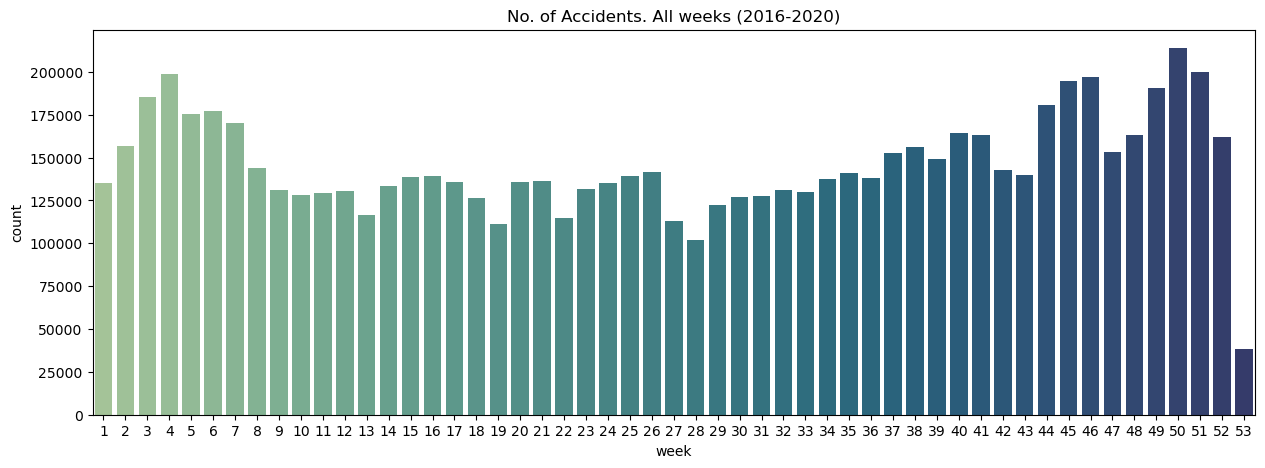

In [39]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=df.Start_Time.dt.isocalendar().week, data=df, orient = 'v', palette = "crest")
c.set_title("No. of Accidents. All weeks (2016-2020)")
plt.show()

The majority of cases tend to occur later in the week, with fewer cases reported on Saturdays and Sundays.
The end of the year had a higher number of cases compared to other weeks, as shown in the figure above.

# Monthly

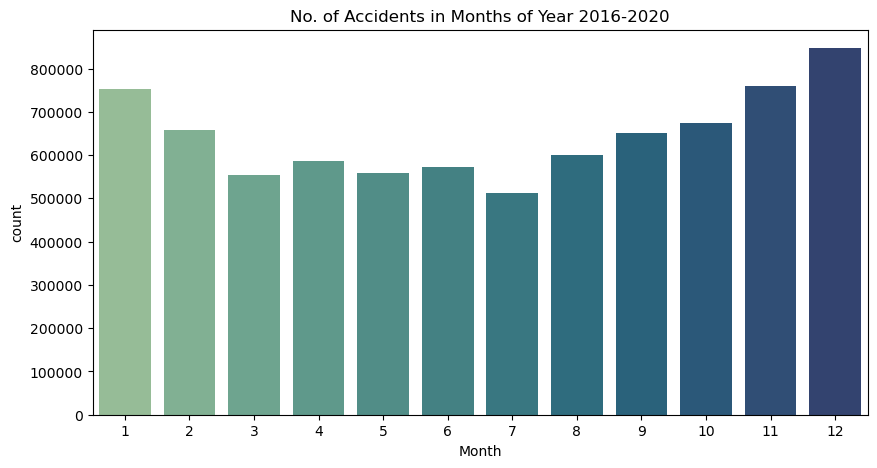

In [40]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=df, orient = 'v', palette = "crest")
#plt.annotate('Data Not Available',xy=(2,50000), fontsize=11)
c.set_title("No. of Accidents in Months of Year 2016-2020")
plt.show()

Like the data for "all weeks", the end of the year had a higher number of cases.